Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data and Preprocessing

In [7]:
# Load the data
data = pd.read_csv('Comment_Data.csv')

# Text preprocessing function
def preprocess_text(text):
    # Check if the input is a string, otherwise return an empty string
    if not isinstance(text, str):
        return ''
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters and digits
    text = re.sub(r'[^a-z]+', ' ', text)
    
    # Tokenize the words
    words = text.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join the words back into a single string
    text = ' '.join(words)
    
    return text

# Preprocess the data
data['comment'] = data['comment'].apply(preprocess_text)

Splitting the data in Training and Testing Data

In [8]:
# Split the data into Training and Testing sets
X = data['comment']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
print(X_train, X_test, y_train, y_test)

232    waste management seems like right oracle omaha...
59     twitter engineer told verge elon musk appear u...
6      twitter working expensive blue subscription ti...
185    washington post sale spokespeople newspaper ow...
173    ltima aventura empresarial embarcado bill gate...
                             ...                        
188    amazon founder need part business order finall...
71     esther crawford introduced elon musk twitter c...
106    company sell flying motorbike listed nasdaq me...
270               buffett said idiot buying stock sooner
102    first interview since relationship billionaire...
Name: comment, Length: 240, dtype: object 203    insider zahra tayeb asked chatgpt personality ...
266                     investing tip investor long term
152    could evolution rise technology ever changing ...
9      elon musk lying last october told bloomberg pe...
233         warren buffett stock problem financial trend
226    brett harrison said saturday bankman fr

In [10]:
# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [13]:
X_train_df = pd.DataFrame(X_train_vectorized.toarray(), columns=vectorizer.get_feature_names())

print(X_train_df)

     abandoned  ability  able  abonn  abonnement  abruptly  abused  access  \
0          0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
1          0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
2          0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
3          0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
4          0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
..         ...      ...   ...    ...         ...       ...     ...     ...   
235        0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
236        0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
237        0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
238        0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   
239        0.0      0.0   0.0    0.0         0.0       0.0     0.0     0.0   

     accordi  according  ...  wreckage  wrote  yami  year  year

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Train the Naïve Bayes model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Test the model on the Testing Set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['musk', 'bezos', 'buffett'], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Percentage wise Confusion Matrix

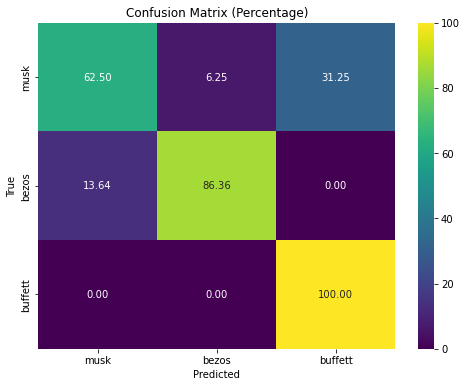

In [5]:
# Calculate the percentage confusion matrix
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix_percentage = np.round(conf_matrix_percentage * 100, 2)

# Visualize the percentage confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='viridis', xticklabels=['musk', 'bezos', 'buffett'], yticklabels=['musk', 'bezos', 'buffett'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Percentage)')
plt.show()
